### Importing the libraries and extracting the dataset

In [2]:
from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

### Preprocessing the data and visualizing the data

In [4]:
x_train, x_test = x_train/255, x_test/255

In [5]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize=(16, 16))
axes = axes.ravel()
n_train = len(y_train)

for i in range(0, W_grid*L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(x_train[index])
    labelindex = y_train[index]
    axes[i].set_title(class_names[int(labelindex)], fontsize=10)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

### Creating the CNN

In [9]:
CNN_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.2),
    
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax'),
])
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [10]:
CNN_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

### Training the model

In [12]:
history = CNN_model.fit(
    x_train,
    y_train,
    callbacks = keras.callbacks.EarlyStopping(monitor='loss', patience=3),
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(x_validation, y_validation))

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 89s 69ms/step - accuracy: 0.4470 - loss: 1.7842 - val_accuracy: 0.5789 - val_loss: 1.2448
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 73ms/step - accuracy: 0.6988 - loss: 0.8634 - val_accuracy: 0.7097 - val_loss: 0.8435
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 71ms/step - accuracy: 0.7690 - loss: 0.6629 - val_accuracy: 0.7457 - val_loss: 0.7473
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 71ms/step - accuracy: 0.8174 - loss: 0.5256 - val_accuracy: 0.7483 - val_loss: 0.7318
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 69ms/step - accuracy: 0.8524 - loss: 0.4236 - val_accuracy: 0.7713 - val_loss: 0.7121
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 69ms/step - accuracy: 0.8830 - loss: 0.3336 - val_accuracy: 0.7378 - val_loss: 0.8652
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 73ms/step - accuracy: 0.9066 - loss: 0.2665 - val_accuracy: 0.7665 - val_loss: 0.7800
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 86s 69ms/step - accuracy: 0.9267 -

Text(0.5, 1.0, 'Train - Accuracy')

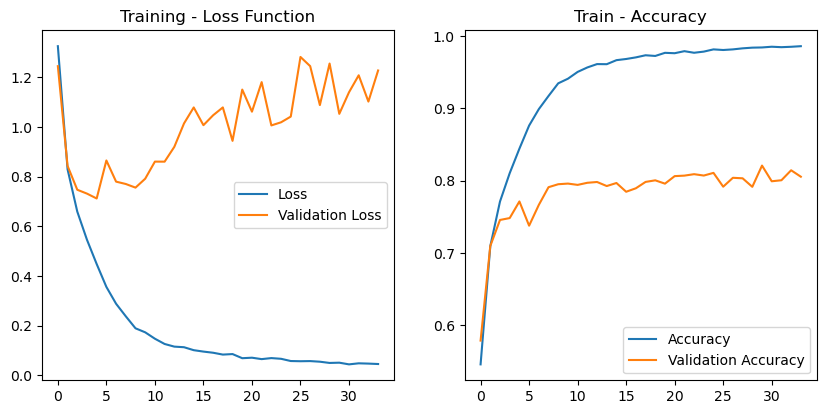

In [20]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [22]:
score = CNN_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 1.3073
Test Accuracy : 0.8016


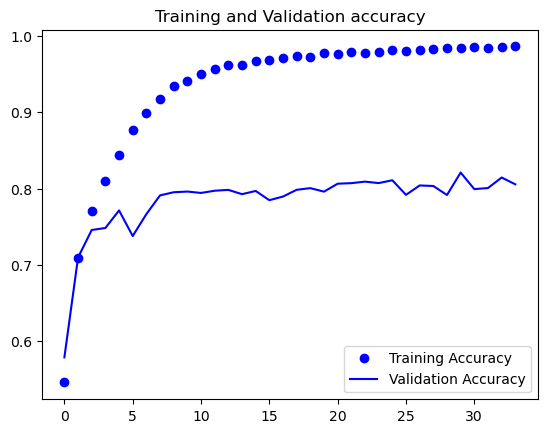

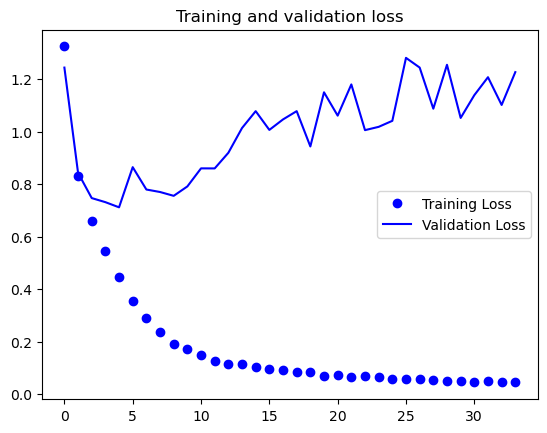

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [32]:
predict_x = CNN_model.predict(x_test)
classes_x = np.argmax(predict_x, axis=1)
y_true = y_test
correct = np.nonzero(classes_x==y_true)[0]
incorrect = np.nonzero(classes_x!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, classes_x, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
              precision    recall  f1-score   support

     Class 0       0.76      0.88      0.81      1000
     Class 1       0.88      0.93      0.90      1000
     Class 2       0.66      0.79      0.72      1000
     Class 3       0.69      0.60      0.64      1000
     Class 4       0.82      0.73      0.78      1000
     Class 5       0.73      0.74      0.73      1000
     Class 6       0.90      0.78      0.84      1000
     Class 7       0.82      0.85      0.83      1000
     Class 8       0.92      0.86      0.89      1000
     Class 9       0.90      0.85      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



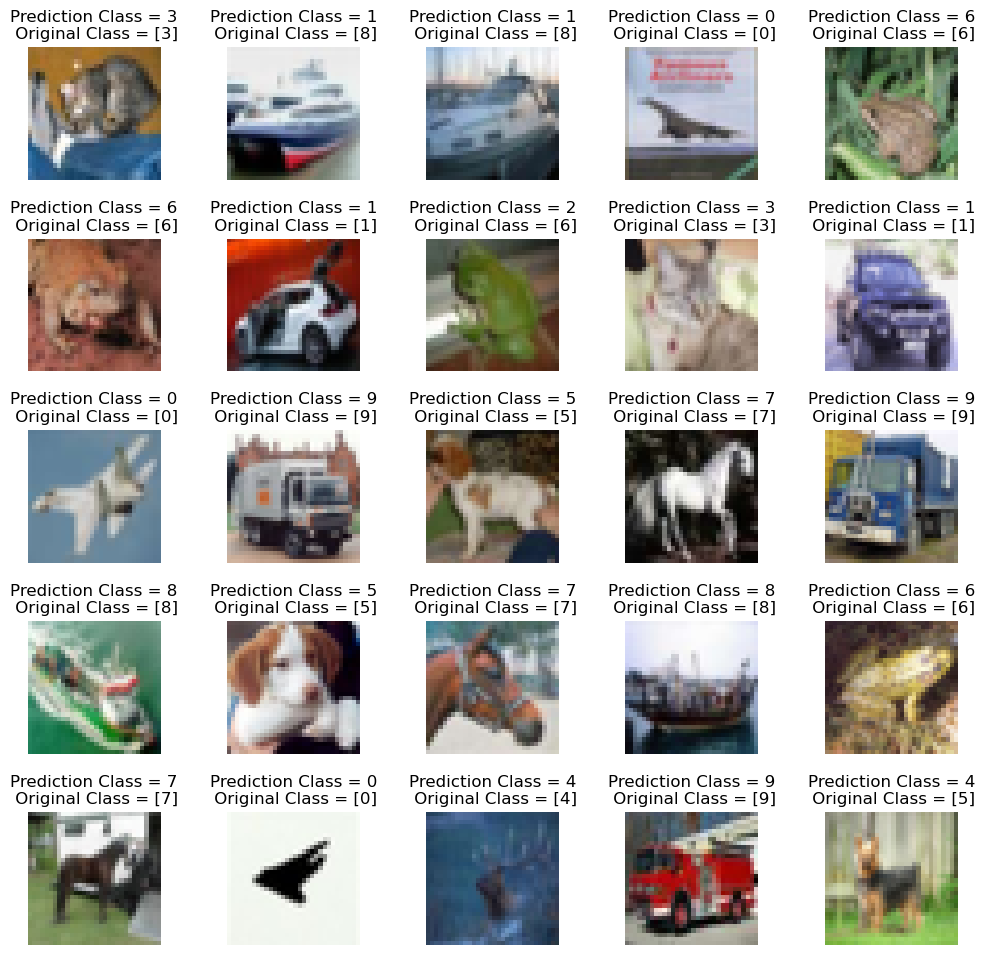

In [42]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"Prediction Class = {classes_x[i]}\n Original Class = {y_test[i]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)